# Sparse matrices and graphs

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
#mpl.rcParams['mathtext.fontset'] = 'stix'
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = 'stix'

In [3]:
import scipy.sparse as sp
import scipy.sparse.linalg
import numpy as np
import scipy.linalg as la
import networkx as nx

## COO: Coordinate list format

In [4]:
values = [1, 2, 3, 4]

In [5]:
rows = [0, 1, 2, 3]

In [6]:
cols = [1, 3, 2, 0]

In [7]:
A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])

In [8]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [9]:
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [10]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int64'), 2)

In [11]:
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [12]:
A.row

array([0, 1, 2, 3], dtype=int32)

In [13]:
A.col

array([1, 3, 2, 0], dtype=int32)

In [14]:
A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.longlong'>'
	with 4 stored elements in Compressed Sparse Row format>

In [15]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [16]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [17]:
A.tocsr()[2, 2]

3

## CSR (compressed sparse row) format

In [18]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]]); A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [19]:
A = sp.csr_matrix(A)

In [20]:
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [21]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32)

In [22]:
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [23]:
i = 2

In [24]:
A.indptr[i], A.indptr[i+1]-1

(4, 5)

In [25]:
A.indices[A.indptr[i]:A.indptr[i+1]]

array([2, 3], dtype=int32)

In [26]:
A.data[A.indptr[i]:A.indptr[i+1]]

array([5, 6], dtype=int64)

## Functions for constructing sparse matrices

In [27]:
N = 10

In [28]:
A = -2 * sp.eye(N) + sp.eye(N, k=1) + sp.eye(N, k=-1)

In [29]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [30]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

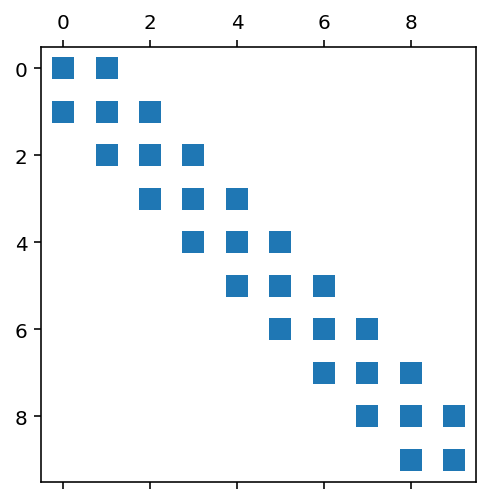

In [31]:
fig, ax = plt.subplots()
ax.spy(A)

In [32]:
A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csc')

In [33]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

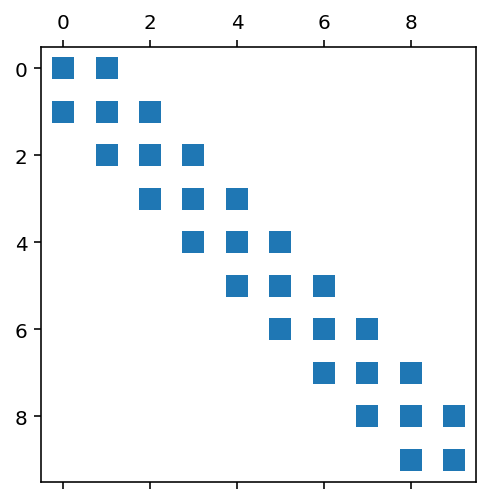

In [34]:
fig, ax = plt.subplots()
ax.spy(A);

In [35]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])

In [36]:
B

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements (2 diagonals) in DIAgonal format>

In [37]:
C = sp.kron(A, B, format='csr')
C

<30x30 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

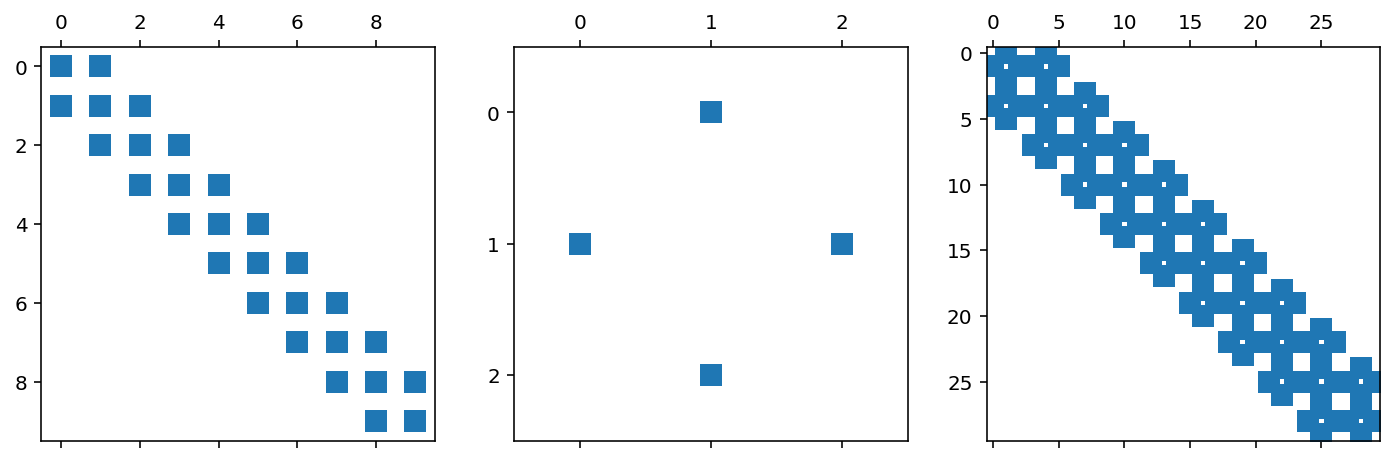

In [38]:
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)

## Sparse linear algebra

In [39]:
N = 10

In [40]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

In [41]:
b = -np.ones(N)

In [42]:
x = sp.linalg.spsolve(A, b)

In [43]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [44]:
np.linalg.solve(A.todense(), b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [45]:
lu = sp.linalg.splu(A)

In [46]:
lu.L

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [47]:
lu.perm_r

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32)

In [48]:
lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [49]:
def sp_permute(A, perm_r, perm_c):
    """ permute rows and columns of A """
    M, N = A.shape
    # row permumation matrix
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    # column permutation matrix
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()
    return Pr.T * A * Pc.T

In [50]:
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

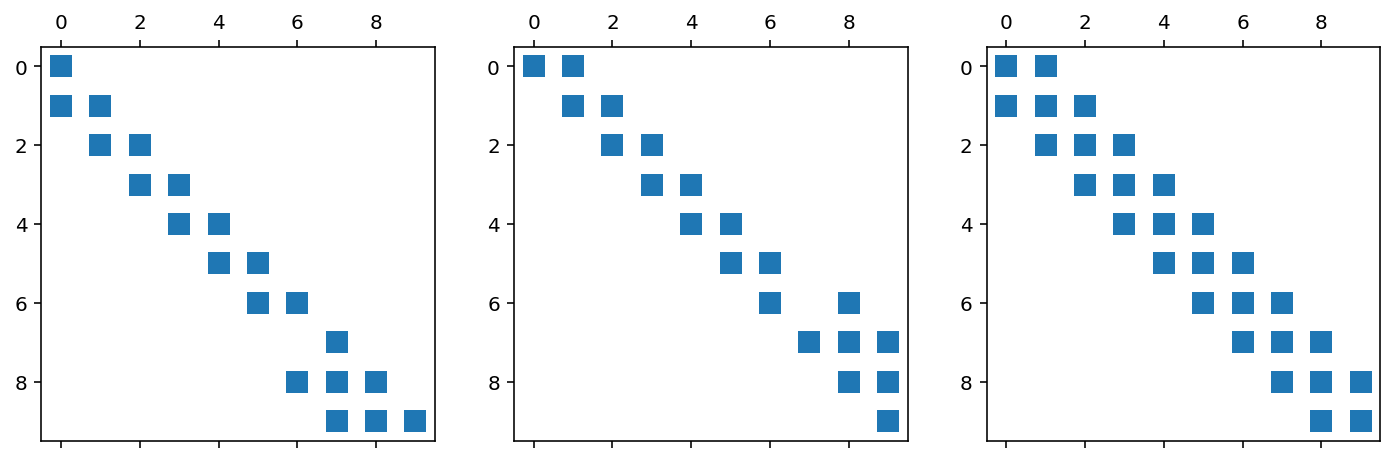

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.spy(lu.L)
ax2.spy(lu.U)
ax3.spy(A)

In [52]:
x = lu.solve(b)

In [53]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [54]:
# use_umfpack=True is only effective if scikit-umfpack is installed
# (in which case UMFPACK is the default solver)
x = sp.linalg.spsolve(A, b, use_umfpack=True)

In [55]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [56]:
x, info = sp.linalg.cg(A, b)

In [57]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [58]:
x, info = sp.linalg.bicgstab(A, b)

In [59]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [60]:
# atol argument is a recent addition
x, info = sp.linalg.lgmres(A, b, atol=1e-5)

In [61]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [62]:
N = 25

### An example of a matrix reording method: Reverse Cuthil McKee

In [63]:
A = sp.diags([1, -2, 1], [8, 0, -8], shape=[N, N], format='csc')

In [64]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
perm

array([ 7, 15, 23,  1,  9, 17,  2, 10, 18,  3, 11, 19,  4, 12, 20,  5, 13,
       21,  6, 14, 22, 24, 16,  8,  0], dtype=int32)

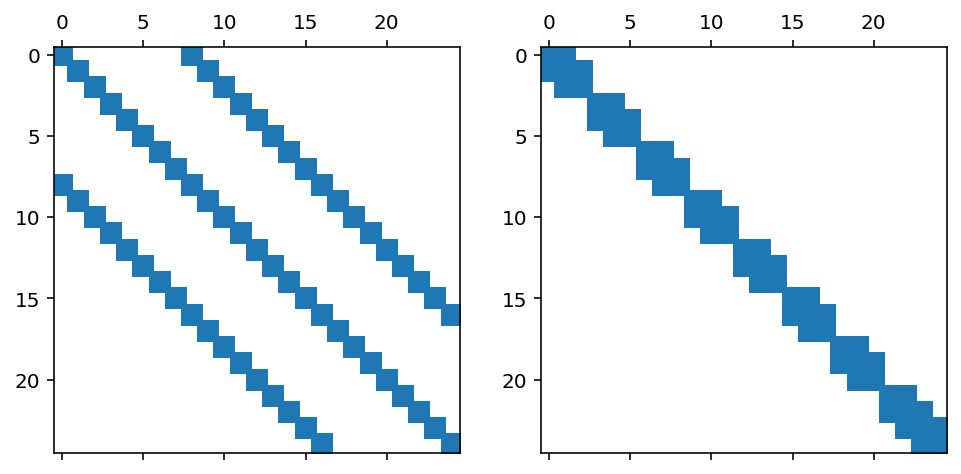

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A)
ax2.spy(sp_permute(A, perm, perm))

### Performance comparison sparse/dense

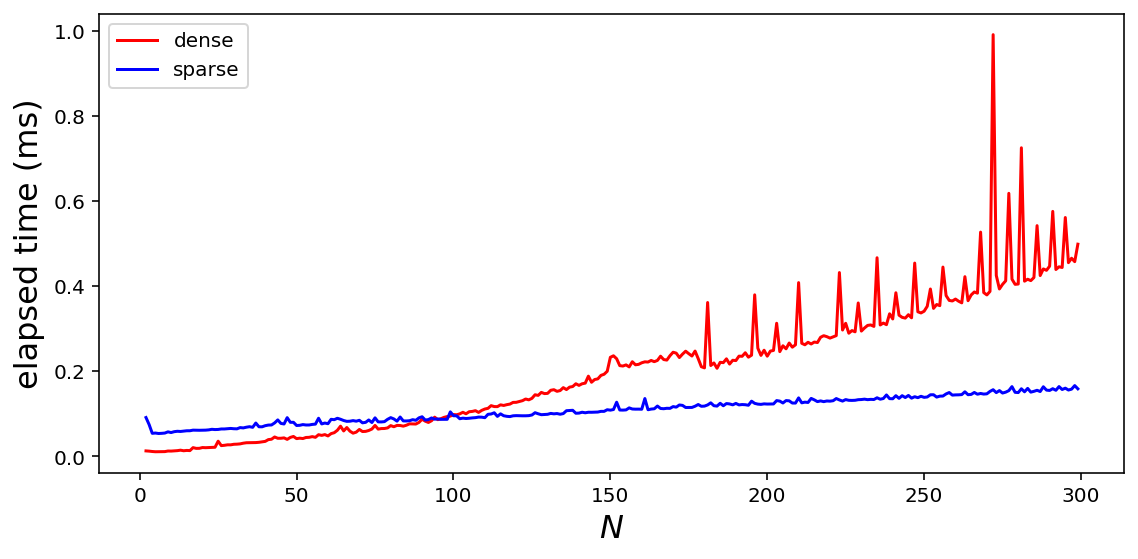

In [116]:
# compare performance of solving Ax=b vs system size N,
# where A is the sparse matrix for the 1d poisson problem
import time

def setup(N):
    A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csr')
    b = -np.ones(N)
    return A, A.todense(), b

reps = 10
N_vec = np.arange(2, 300, 1)
t_sparse = np.empty(len(N_vec))
t_dense = np.empty(len(N_vec))
for idx, N in enumerate(N_vec):
    A, A_dense, b = setup(N)
    t = time.time()
    for r in range(reps):
        x = np.linalg.solve(A_dense, b)
    t_dense[idx] = (time.time() - t)/reps
    t = time.time()
    for r in range(reps):
        x = sp.linalg.spsolve(A, b, use_umfpack=True)
    t_sparse[idx] = (time.time() - t)/reps
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(N_vec, t_dense * 1e3, 'r-', label="dense")
ax.plot(N_vec, t_sparse * 1e3, 'b-', label="sparse")
ax.set_xlabel(r"$N$", fontsize=16)
ax.set_ylabel("elapsed time (ms)", fontsize=16)
ax.legend(loc=0)
fig.tight_layout()

## Graphs

In [67]:
g = nx.Graph()

In [68]:
g.add_node(1)

In [69]:
g.nodes()

NodeView((1,))

In [70]:
g.add_nodes_from([3, 4, 5])

In [71]:
g.nodes()

NodeView((1, 3, 4, 5))

In [72]:
g.add_edge(1, 2)

In [73]:
g.edges()

EdgeView([(1, 2)])

In [74]:
g.add_edges_from([(3, 4), (5, 6)])

In [75]:
g.edges()

EdgeView([(1, 2), (3, 4), (5, 6)])

In [76]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])

In [77]:
g.edges()

EdgeView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6)])

In [78]:
g.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {'weight': 1.5}), (3, 4, {}), (3, 5, {'weight': 2.5}), (5, 6, {})])

In [79]:
g.add_weighted_edges_from([(6, 7, 1.5)])

In [80]:
g.nodes()

NodeView((1, 3, 4, 5, 2, 6, 7))

In [81]:
g.edges()

EdgeView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)])

In [82]:
import numpy as np

In [83]:
import json

In [84]:
with open("stations.json") as f:
    data = json.load(f)

In [85]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [86]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [87]:
# data

In [88]:
g = nx.Graph()

for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [89]:
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [90]:
g.number_of_nodes()

184

In [91]:
list(g.nodes())[:5]

['C1', 'C2', 'C3', 'C4', 'C5']

In [92]:
g.number_of_edges()

243

In [93]:
list(g.edges())[:5]

[('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C3', 'F15'), ('C4', 'C5')]

In [94]:
on_foot = [edge for edge in g.edges() if g.get_edge_data(*edge)["transfer"]]

In [95]:
on_train = [edge for edge in g.edges() if not g.get_edge_data(*edge)["transfer"]]

In [96]:
colors = [data[n[0].upper()]["color"] for n in g.nodes()]

In [97]:
from networkx.drawing.nx_agraph import graphviz_layout

** NOTE**

To run the following code, you need to install "pygraphviz" and restart this notebook

```
$ conda install pygraphviz
```

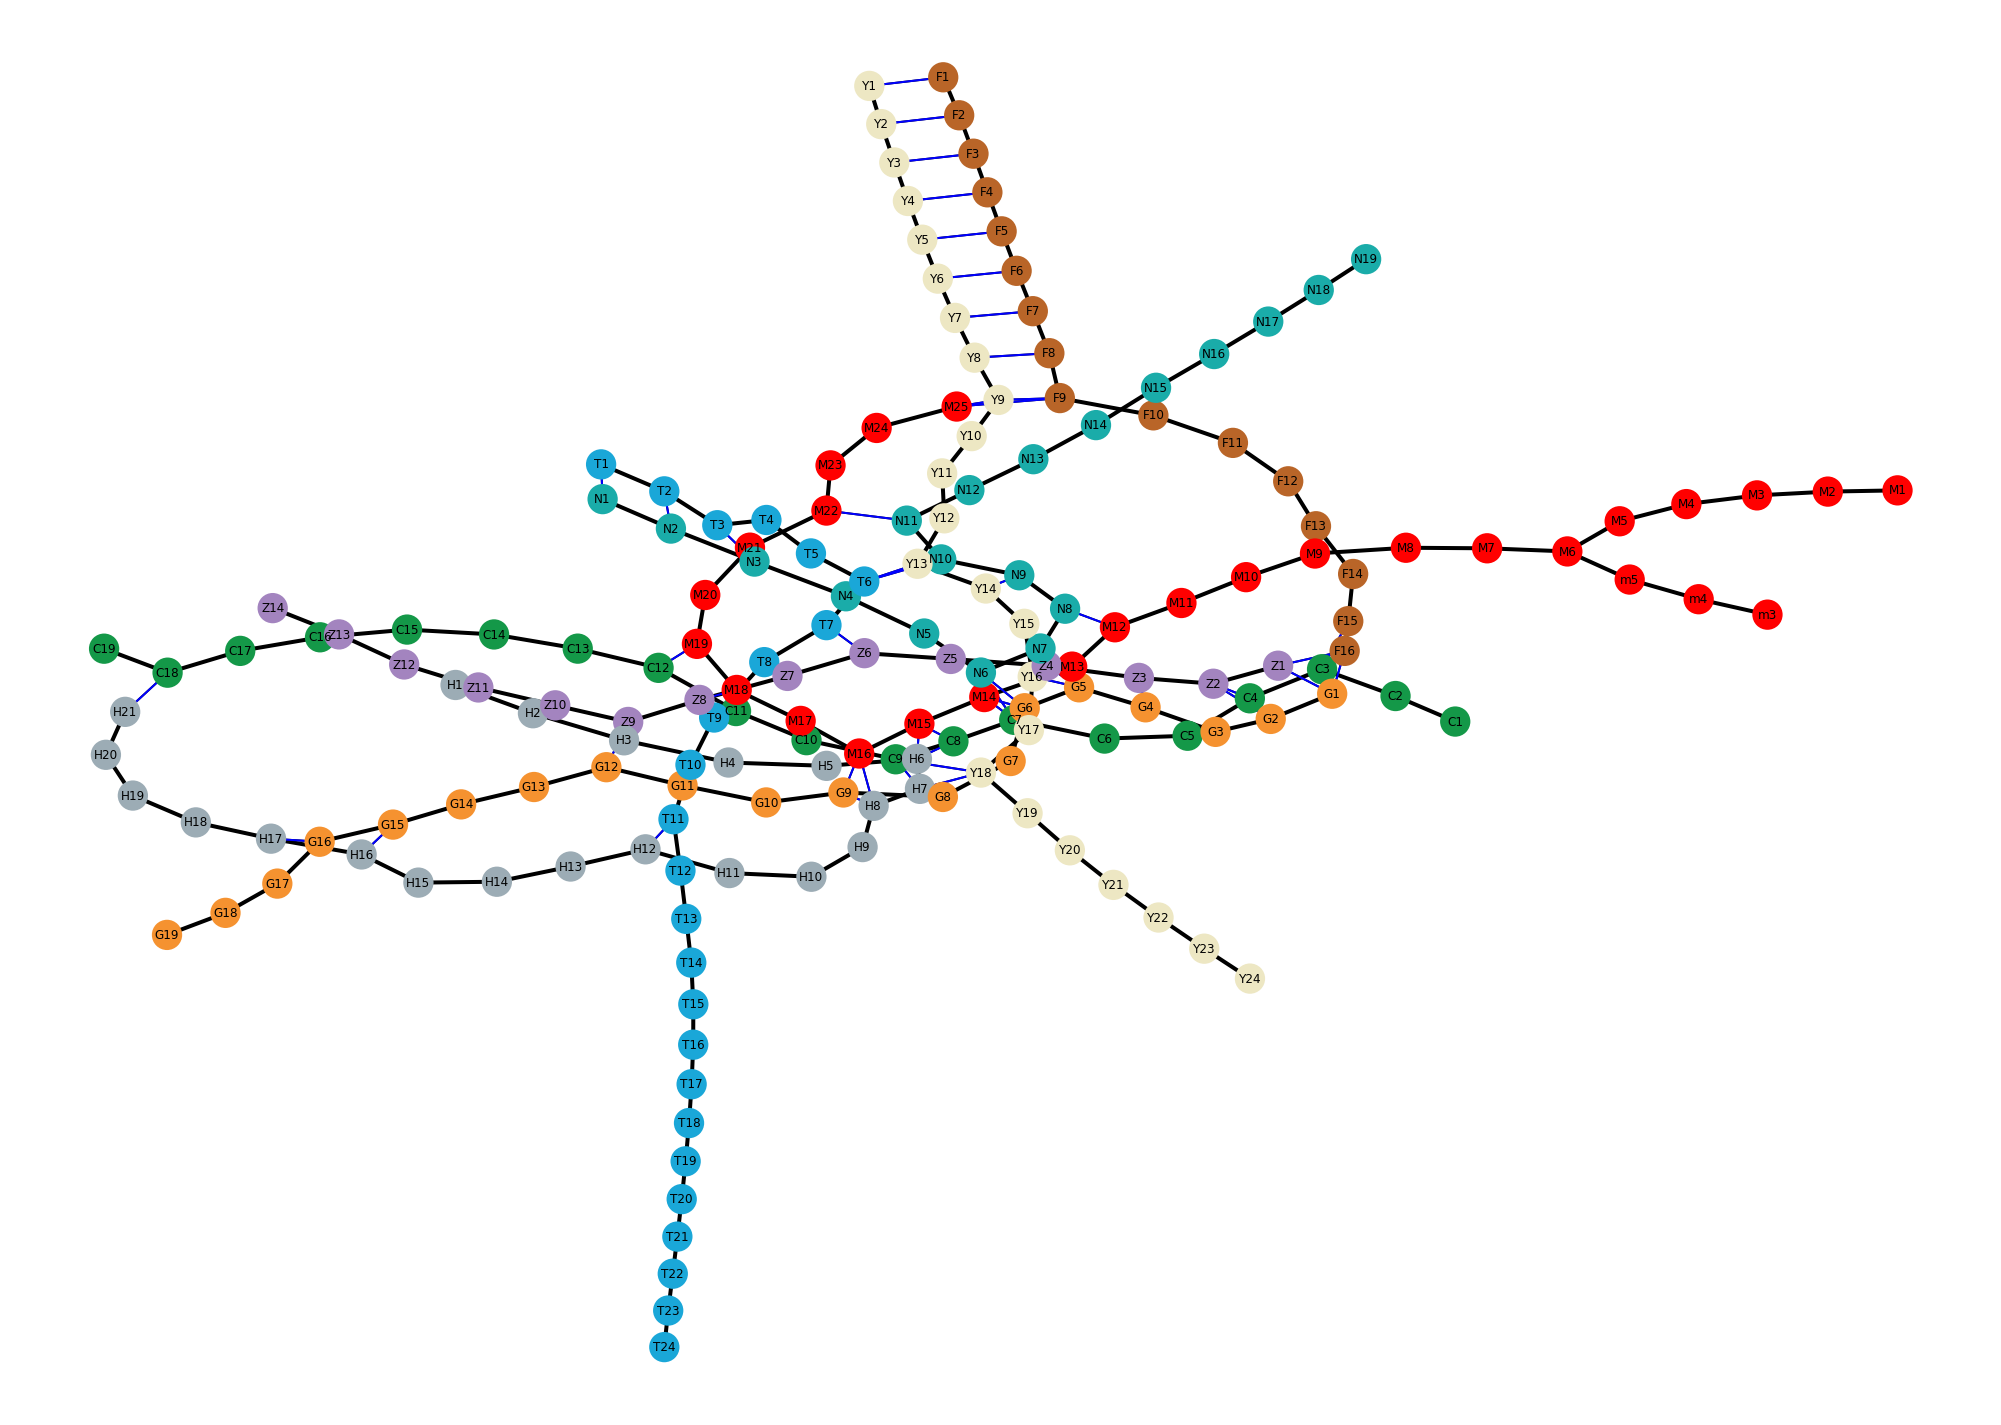

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="blue")

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

fig.tight_layout()

In [99]:
# degree = number of connections on each node

g.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

Which node(s) has/have the maximum number of connection?

In [100]:
d_max = max(d for (n, d) in g.degree())

In [101]:
[(n, d) for (n, d) in g.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

Finding the shortest parth between two nodes

In [102]:
p = nx.shortest_path(g, "Y24", "C19")

In [103]:
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

Travel time (sum of weights) between the two nodes:

In [104]:
np.sum([g[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in g[p[n]][p[n+1]]])

35

If there is "transfer", add additional weight of "5" (e.g. time to transfer trains in a subway system)

In [105]:
h = g.copy()

In [106]:
for n1, n2 in h.edges():
    if "transfer" in h[n1][n2]:
        h[n1][n2]["weight"] = 5

Now we re-calculate the travel time (sum of weights, including the weights of "transfer" now):

In [107]:
p = nx.shortest_path(h, "Y24", "C19")

In [108]:
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [109]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

85

In [110]:
p = nx.shortest_path(h, "Z1", "H16")

In [111]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

65

In [112]:
A = nx.to_scipy_sparse_matrix(g)

In [113]:
A

<184x184 sparse matrix of type '<class 'numpy.longlong'>'
	with 486 stored elements in Compressed Sparse Row format>

In [114]:
perm = sp.csgraph.reverse_cuthill_mckee(A)

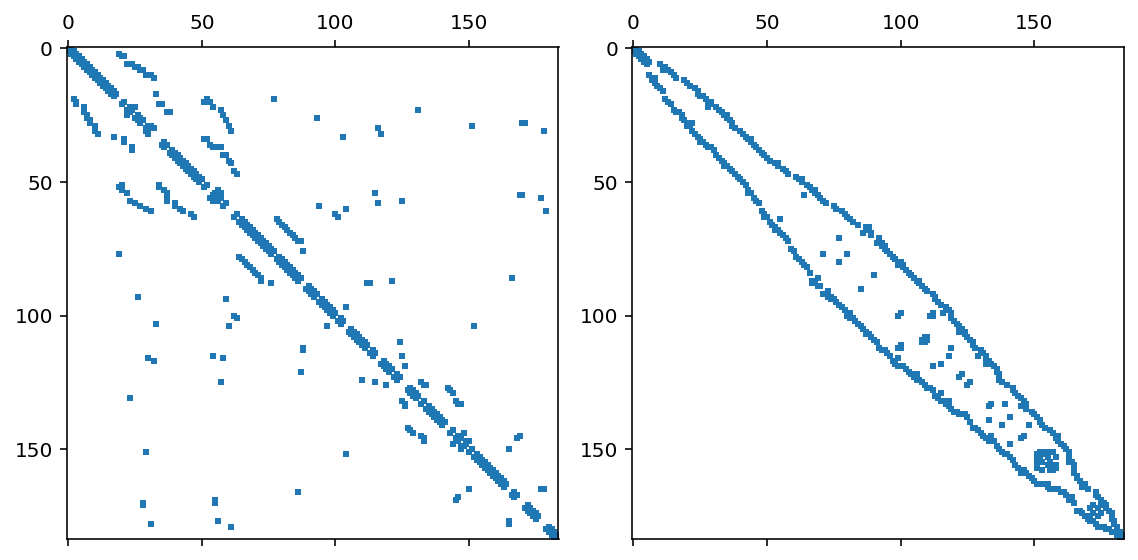

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)
fig.tight_layout()